Visualizing data for different teams

The CEO of a company with multiple liquor stores in Iowa asked to give information on the financial performance of the company of 2015 for 3 levels within the company:
- C-level
- County sales director
- The store manager

He wants to know how the sales and the profit have developed over the year for each level

In [67]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Import dataset from csv file (Kaggle link https://www.kaggle.com/residentmario/iowa-liquor-sales)
filename = "Iowa_Liquor_Sales.csv"
df = pd.read_csv(filename, low_memory=False, index_col='Date', parse_dates=True)

In [ ]:
# Exploring the data
df.info()

In [3]:
df.head(10)

,Invoice/Item Number,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-20,S29198800001,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,NaN,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
2015-11-21,S29195400002,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,NaN,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2015-11-16,S29050300001,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,NaN,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
2015-11-04,S28867700001,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,NaN,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
2015-11-17,S29050800001,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,NaN,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
2015-11-11,S28869200001,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47.0,Ida,NaN,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,1,$53.34,1.75,0.46
2015-11-09,S28865700001,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,1701100.0,...,238,Forbidden Secret Coffee Pack,6,1500,$11.62,$17.43,6,$104.58,9.00,2.38
2015-11-10,S28869500001,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,NaN,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,2,$106.68,3.50,0.92
2015-11-30,S29339300091,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70.0,Muscatine,1701100.0,...,173,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,4,$117.48,3.00,0.79


In [ ]:
df.shape

In [69]:
# CLEAN THE HEADER NAMES
# Convert al headers to lowercase
df.columns = map(str.lower, df.columns)
# Remove spaces in headers
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('/', '')

In [ ]:
df.columns

In [70]:
# CLEAN THE COLUMNS WITH DOLLAR DATA FROM OBJ TO NUMERIC

# Remove the dollar signs & change to numeric of the columns
df['sale_dollars'] = df.sale_dollars.astype(str).apply(lambda x: x.replace('$', ''))
df["sale_dollars"] = pd.to_numeric(df["sale_dollars"], errors='coerce')

df['state_bottle_cost'] = df.state_bottle_cost.astype(str).apply(lambda x: x.replace('$', ''))
df["state_bottle_cost"] = pd.to_numeric(df["state_bottle_cost"], errors='coerce')

In [71]:
# Add 2 columns with the total_cost and the total_margin
df["total_cost"] = df["state_bottle_cost"] * df["bottles_sold"]
df["total_profit"] = df["sale_dollars"] - df["total_cost"]

In [72]:
# Select the important columns of the df
df2 = df[['store_number', 'store_name', 'city', 'county_number', 'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description','state_bottle_cost', 'bottles_sold', 'sale_dollars', 'total_cost', 'total_profit']]

In [73]:
# Make 2 additional data sets for the County Sales Director and The Store Manager for 2015
df_county = df[df['county'] == 'Lee']
df_county_2015 = df_county['2015']
df_store = df[df['store_name'] == 'Keokuk Spirits']
df_store_2015 = df_store['2015']

In [74]:
# Get the top 5 best performing stores for county Lee
df_per_store = df_county_2015.groupby('store_name').sum()
df_per_store_sorted = df_per_store.sort_values(by = ['sale_dollars'], inplace = False, ascending = False)
df_per_store_top_5 = df_per_store_sorted.head(5)
df_per_store_top_5.reset_index(inplace = True)

In [75]:
# Get the top 5 best performing products for the store Keokuk Spirits
df_per_product = df_store_2015.groupby('item_description').sum()
df_per_product_sorted = df_per_product.sort_values(by = ['sale_dollars'], inplace = False, ascending = False)
df_per_product_top_5 = df_per_product_sorted.head(5)
df_per_product_top_5.reset_index(inplace = True)

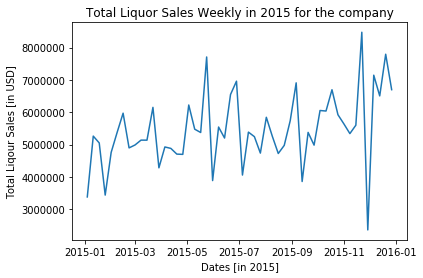

In [76]:
# For c-level - Downsample df by month and aggregate by sum of sales for the company
# Make the graphs

df_test = df[['sale_dollars']]

df_test = df_test.resample('W').sum()

plt.plot(df_test['2015'])

plt.xlabel('Dates [in 2015]')
plt.ylabel('Total Liqour Sales [in USD]')
plt.title('Total Liquor Sales Weekly in 2015 for the company')

plt.show()

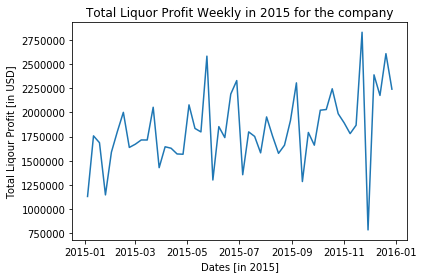

In [77]:
# For c-level - Downsample df by month and aggregate by sum of profit for the company
# Make the graphs

df_test = df[['total_profit']]

df_test = df_test.resample('W').sum()

plt.plot(df_test['2015'])

plt.xlabel('Dates [in 2015]')
plt.ylabel('Total Liqour Profit [in USD]')
plt.title('Total Liquor Profit Weekly in 2015 for the company')

plt.show()

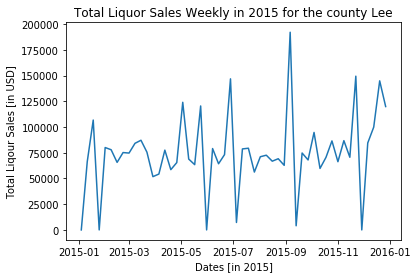

In [78]:
# For the county manager - Downsample df by month and aggregate by sum of sales for the county Lee
# Make the graphs 

df_test = df_county[['sale_dollars']]

df_test = df_test.resample('W').sum()

plt.plot(df_test['2015'])

plt.xlabel('Dates [in 2015]')
plt.ylabel('Total Liqour Sales [in USD]')
plt.title('Total Liquor Sales Weekly in 2015 for the county Lee')

plt.show()

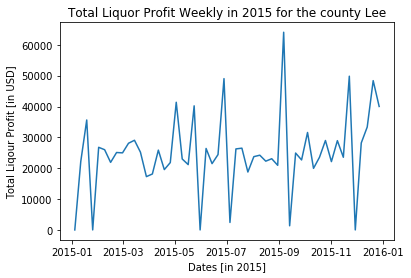

In [79]:
# For the county manager - Downsample df by month and aggregate by sum of profit for the county Lee
# Make the graphs 

df_test = df_county[['total_profit']]

df_test = df_test.resample('W').sum()

plt.plot(df_test['2015'])

plt.xlabel('Dates [in 2015]')
plt.ylabel('Total Liqour Profit [in USD]')
plt.title('Total Liquor Profit Weekly in 2015 for the county Lee')

plt.show()

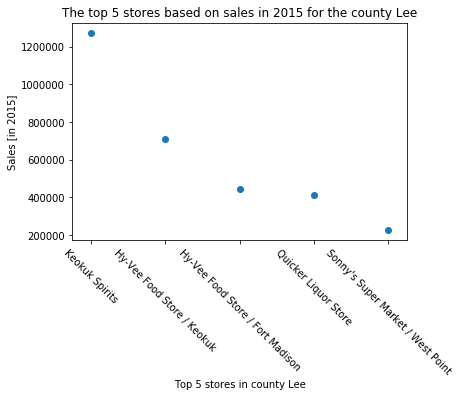

In [80]:
# For the county manager - The top 5 stores based on sales in 2015 for the county Lee
# Make the graphs 

x = np.array([1,2,3,4,5])
y = df_per_store_top_5[['sale_dollars']]
my_xticks = df_per_store_top_5['store_name']
plt.xticks(x, my_xticks, rotation=-45)
plt.scatter(x, y)

plt.xlabel('Top 5 stores in county Lee')
plt.ylabel('Sales [in 2015]')
plt.title('The top 5 stores based on sales in 2015 for the county Lee')

plt.show()

In [90]:
df_per_store_top_5.iloc[:,[0, 10]]

,store_name,sale_dollars
0,Keokuk Spirits,1275911.76
1,Hy-Vee Food Store / Keokuk,708151.90
2,Hy-Vee Food Store / Fort Madison,447074.63
3,Quicker Liquor Store,412492.60
4,Sonny's Super Market / West Point,225444.93


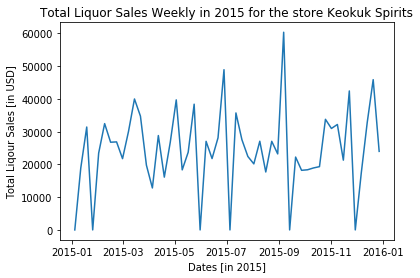

In [81]:
# For the store manager - Downsample df by month and aggregate by sum of sales for the store Keokuk Spirits
# Make the graphs  

df_test = df_store[['sale_dollars']]

df_test = df_test.resample('W').sum()

plt.plot(df_test['2015'])

plt.xlabel('Dates [in 2015]')
plt.ylabel('Total Liqour Sales [in USD]')
plt.title('Total Liquor Sales Weekly in 2015 for the store Keokuk Spirits')

plt.show()

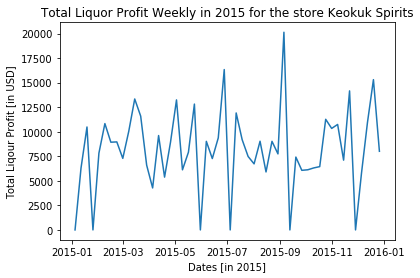

In [82]:
# For the store manager - Downsample df by month and aggregate by sum of profit for the store Keokuk Spirits
# Make the graphs  

df_test = df_store[['total_profit']]

df_test = df_test.resample('W').sum()

plt.plot(df_test['2015'])

plt.xlabel('Dates [in 2015]')
plt.ylabel('Total Liqour Profit [in USD]')
plt.title('Total Liquor Profit Weekly in 2015 for the store Keokuk Spirits')

plt.show()

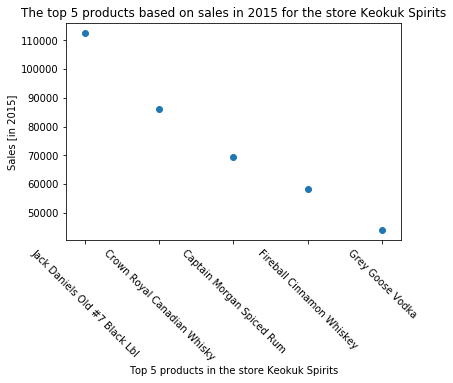

In [83]:
# For the store manager - The top 5 stores based on sales in 2015 for the store Keokuk Spirits
# Make the graphs 

x = np.array([1,2,3,4,5])
y = df_per_product_top_5[['sale_dollars']]
my_xticks = df_per_product_top_5['item_description']
plt.xticks(x, my_xticks, rotation=-45)
plt.scatter(x, y)

plt.xlabel('Top 5 products in the store Keokuk Spirits')
plt.ylabel('Sales [in 2015]')
plt.title('The top 5 products based on sales in 2015 for the store Keokuk Spirits')

plt.show()

In [92]:
df_per_product_top_5.iloc[:,[0, 10]]

,item_description,sale_dollars
0,Jack Daniels Old #7 Black Lbl,112580.24
1,Crown Royal Canadian Whisky,85973.26
2,Captain Morgan Spiced Rum,69391.68
3,Fireball Cinnamon Whiskey,58367.84
4,Grey Goose Vodka,43894.02
